In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
import numpy as np
import os
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

In [2]:
string_labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
import numpy as np
import os
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix



x = []
y = []

## loading data
labels = {"Anger":0,"Disgust":1,"Fear":2,"Happy":3,"Neutral":4,"Sad":5,"Surprise":6}
for label in labels:
    print(label)
    for filename in os.listdir("train/"+label):
        if filename.split(".").pop().lower() == "jpg" or filename.split(".").pop().lower() == "png" or filename.split(".").pop().lower() == "jpeg":
            img = tf.keras.utils.load_img("train/"+label+"/"+filename, target_size=(48,48,1), grayscale=True)
            img = tf.keras.utils.img_to_array(img)
            img = img/255.0
            x.append(img)
            y.append(labels[label])
x = np.array(x)


# # Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle= True)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

  
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split = 0.2, epochs=15, batch_size=64)
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
model.save('expression3.model')






Anger


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


Disgust
Fear
Happy
Neutral
Sad
Surprise
Epoch 1/15


In [4]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 75.37%


In [5]:
y_pred = model.predict(x_test)

91/91 [==============================] - 5s 46ms/step


In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

91/91 [==============================] - 4s 43ms/step


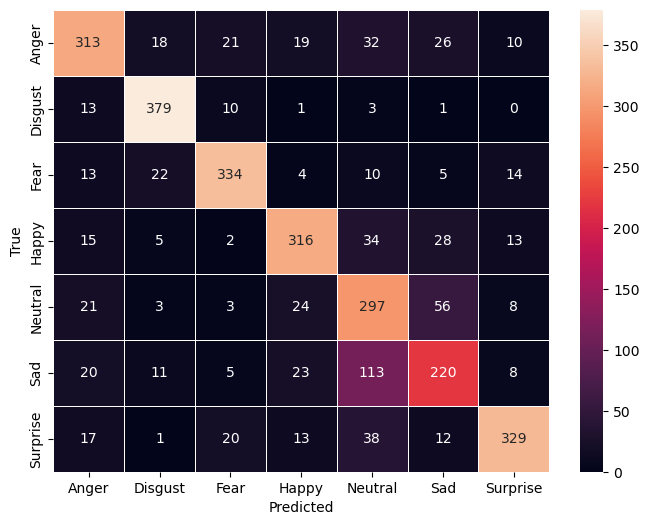

In [7]:
# cm = confusion_matrix(y_test, y_pred)
# #print("Confusion Matrix")
# print("Confusion Matrix:")
# resultclrep = classification_report(y_test, y_pred)
# print("Classification Report:",)
# print (resultclrep)
# result_acc = accuracy_score(y_test,y_pred)
# print("Accuracy:",result_acc)

y_true = y_test
y_pred = model.predict(x_test)
y_true = np.argmax(y_true, axis=1)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred)

# plot with seaborn
fig, ax = plt.subplots(figsize=(8,6))  
ax = sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, xticklabels=string_labels, yticklabels=string_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [19]:
def Train_Val_Plot1(accuracy,val_accuracy):
    
    fig, (ax1) = plt.subplots(1,1, figsize= (20,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(accuracy) + 1), accuracy)
    ax1.plot(range(1, len(val_accuracy) + 1), val_accuracy)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'testing'])


#     ax2.plot(range(1, len(loss) + 1), loss)
#     ax2.plot(range(1, len(val_loss) + 1), val_loss)
#     ax2.set_title('History of Loss')
#     ax2.set_xlabel('Epochs')
#     ax2.set_ylabel('Loss')
#     ax2.legend(['training', 'testing'])
    

    plt.show()

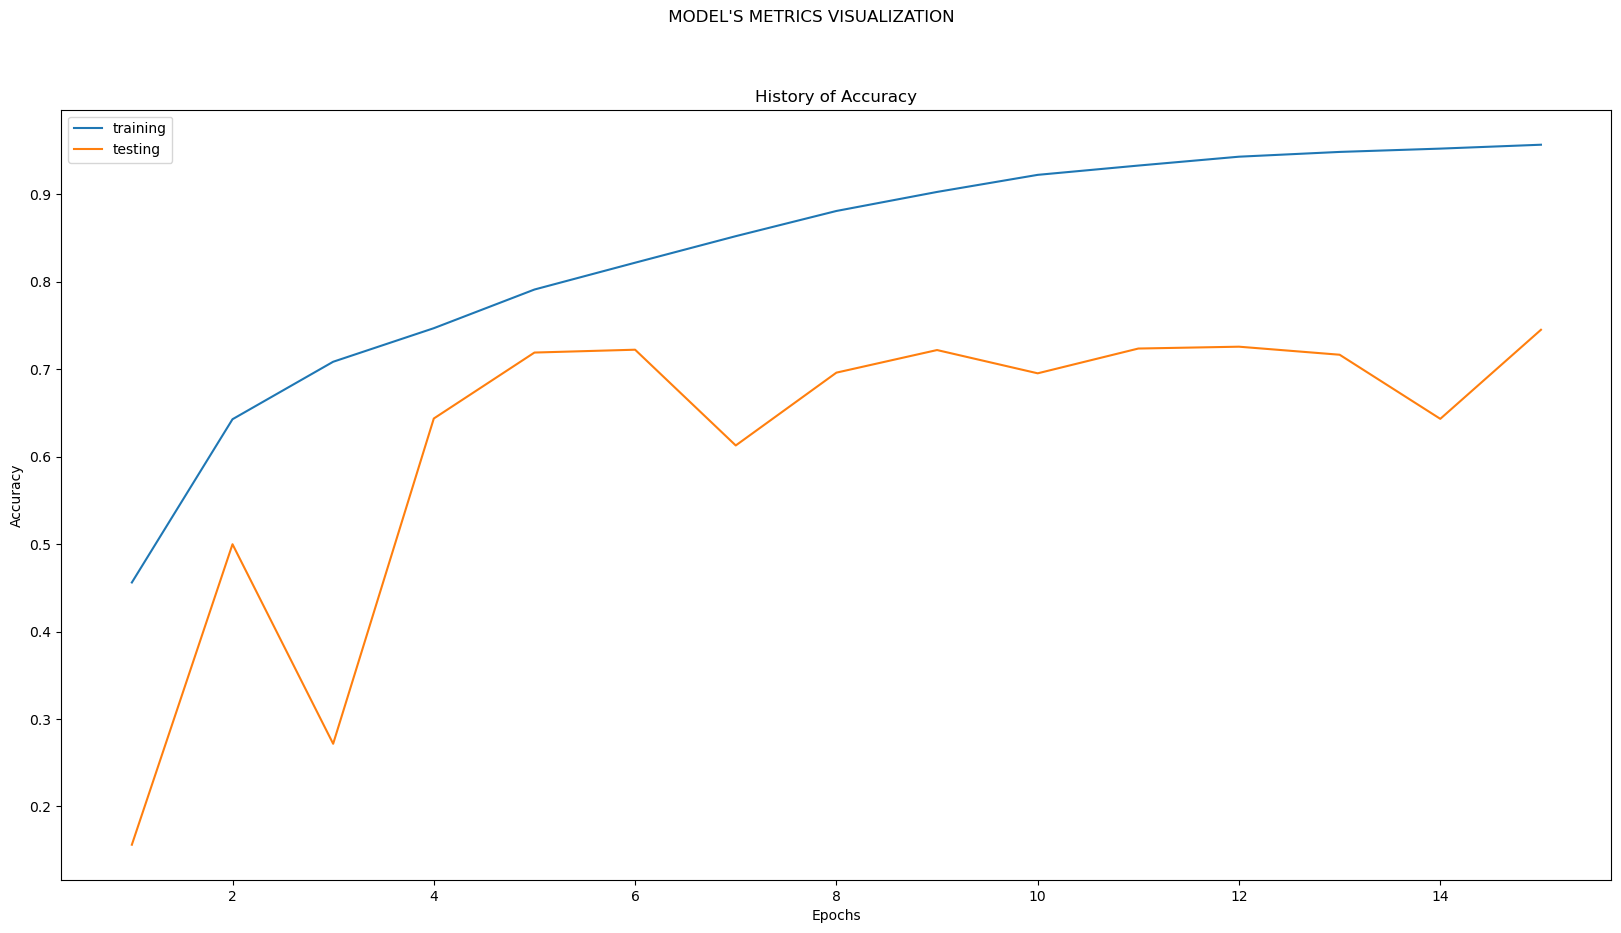

In [20]:
Train_Val_Plot1(history.history['accuracy'],history.history['val_accuracy']
              )

In [21]:
def Train_Val_Plot2(loss,val_loss):
    
    fig, (ax2) = plt.subplots(1,1, figsize= (20,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'testing'])
    

    plt.show()

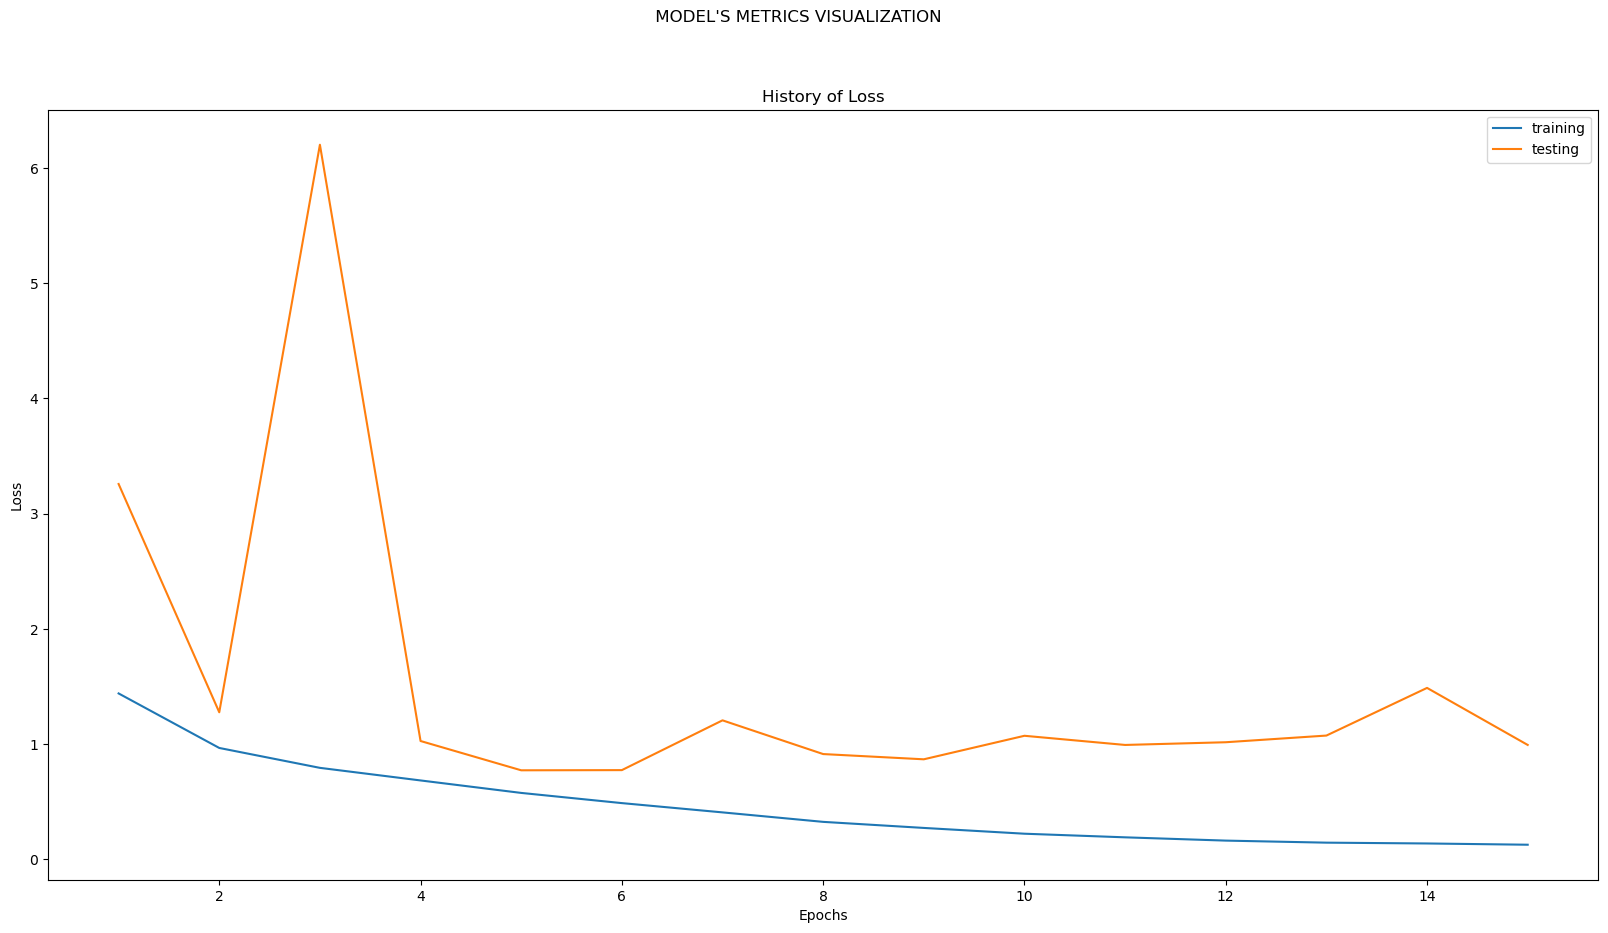

In [22]:
Train_Val_Plot2(history.history['loss'],history.history['val_loss']
              )

In [23]:
history.history['val_loss']

[3.2562456130981445,
 1.2752342224121094,
 6.200475215911865,
 1.0258872509002686,
 0.7717397809028625,
 0.7732618451118469,
 1.2052371501922607,
 0.9126484990119934,
 0.8671451807022095,
 1.0712456703186035,
 0.9917492270469666,
 1.0152322053909302,
 1.0731526613235474,
 1.4867228269577026,
 0.9918484091758728]

In [24]:
history.history['loss']

[1.43876051902771,
 0.9656068086624146,
 0.7929394245147705,
 0.683685302734375,
 0.5754419565200806,
 0.4870229661464691,
 0.40652137994766235,
 0.3242528438568115,
 0.2716127038002014,
 0.2214137613773346,
 0.1900412142276764,
 0.16160374879837036,
 0.14380261301994324,
 0.1367599070072174,
 0.12588796019554138]

In [25]:
history.history['accuracy']

[0.45606815814971924,
 0.6427546143531799,
 0.7084609270095825,
 0.7468414902687073,
 0.7910605072975159,
 0.821736216545105,
 0.8520769476890564,
 0.8808863162994385,
 0.9026607871055603,
 0.9221860766410828,
 0.9328101277351379,
 0.9429556131362915,
 0.9484111666679382,
 0.9521918296813965,
 0.9566424489021301]

In [26]:
history.history['val_accuracy']

[0.15620213747024536,
 0.49980857968330383,
 0.2716309428215027,
 0.6435681581497192,
 0.7189892530441284,
 0.7222434878349304,
 0.6127488613128662,
 0.696018397808075,
 0.7218606472015381,
 0.6952526569366455,
 0.723583459854126,
 0.7256891131401062,
 0.7165007591247559,
 0.6431853175163269,
 0.7450229525566101]